<a href="https://colab.research.google.com/github/mdjabedmollah/ml-learning/blob/main/222002167_CSE412_222D3_LabPerformance07_kMeansClustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


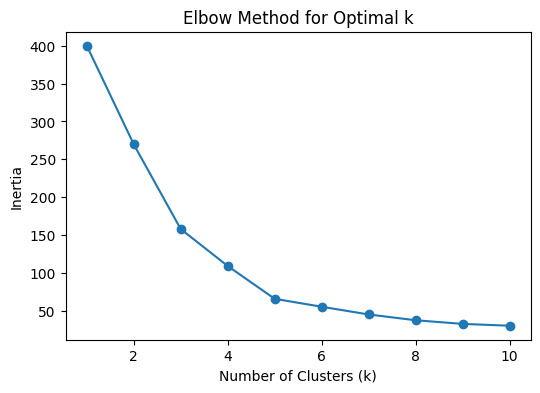


Cluster Counts:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


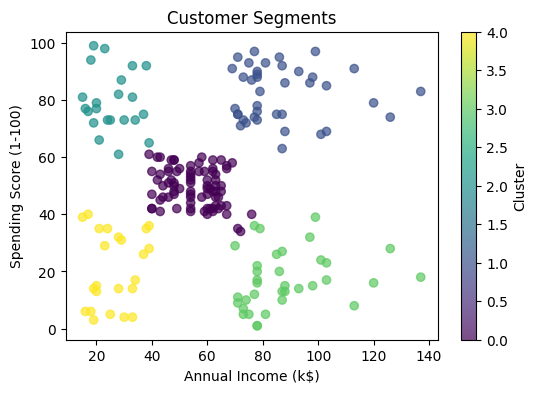

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

file_path = "https://raw.githubusercontent.com/mdjabedmollah/ml-learning/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(file_path)

print("Sample Data:")
print(df.head())


X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCluster Counts:")
print(df["Cluster"].value_counts())

plt.figure(figsize=(6,4))
plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"], cmap="viridis", alpha=0.7
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.colorbar(label="Cluster")
plt.show()
